# **Binary Classification Alogrithms and EDA (Exploratory Data Analysis)**
## Dataset: Wisconsin Breast Cancer Diagnostics 
###
##### Project created by: Adrián Echeverría

#### Libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#### Data loading and integrity verification

In [2]:
# Standard repository path:
df = pd.read_csv("..\data\data.csv")

# Analyze the data types and null values:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
# Observe the target variable's balance:
freq = df['diagnosis'].value_counts()

print(freq)

B    357
M    212
Name: diagnosis, dtype: int64


In [4]:
# Replace the "diagnosis" strings for integers: 
df["diagnosis"] = df["diagnosis"].replace({"B": 0, "M": 1})

# Remove the "id" column:
df = df.drop("id", axis=1)

print(df["diagnosis"].dtype)

int64


#### Exploratory Data Analysis

In [5]:
# Basic statistical values:
print(df.describe())

        diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720       

In [6]:
# Shapiro-Wilk to test normality: 
for col in df.columns:
    stat, p = shapiro(df[col])
    print(f"{col}: stat={stat:.4f}, p={p:.8f}")

# Observation: the relevance of data normality does not really have a big impact in some machine learning algorithms such as logistic regression, random forest and decision tree.
# Nevertheless, it plays a significant role in Naive Bayes.

diagnosis: stat=0.6125, p=0.00000000
radius_mean: stat=0.9411, p=0.00000000
texture_mean: stat=0.9767, p=0.00000007
perimeter_mean: stat=0.9362, p=0.00000000
area_mean: stat=0.8584, p=0.00000000
smoothness_mean: stat=0.9875, p=0.00008600
compactness_mean: stat=0.9170, p=0.00000000
concavity_mean: stat=0.8668, p=0.00000000
concave points_mean: stat=0.8916, p=0.00000000
symmetry_mean: stat=0.9726, p=0.00000001
fractal_dimension_mean: stat=0.9233, p=0.00000000
radius_se: stat=0.7456, p=0.00000000
texture_se: stat=0.8962, p=0.00000000
perimeter_se: stat=0.7182, p=0.00000000
area_se: stat=0.5638, p=0.00000000
smoothness_se: stat=0.8384, p=0.00000000
compactness_se: stat=0.8369, p=0.00000000
concavity_se: stat=0.6721, p=0.00000000
concave points_se: stat=0.9197, p=0.00000000
symmetry_se: stat=0.8284, p=0.00000000
fractal_dimension_se: stat=0.6951, p=0.00000000
radius_worst: stat=0.9135, p=0.00000000
texture_worst: stat=0.9826, p=0.00000257
perimeter_worst: stat=0.9126, p=0.00000000
area_wors

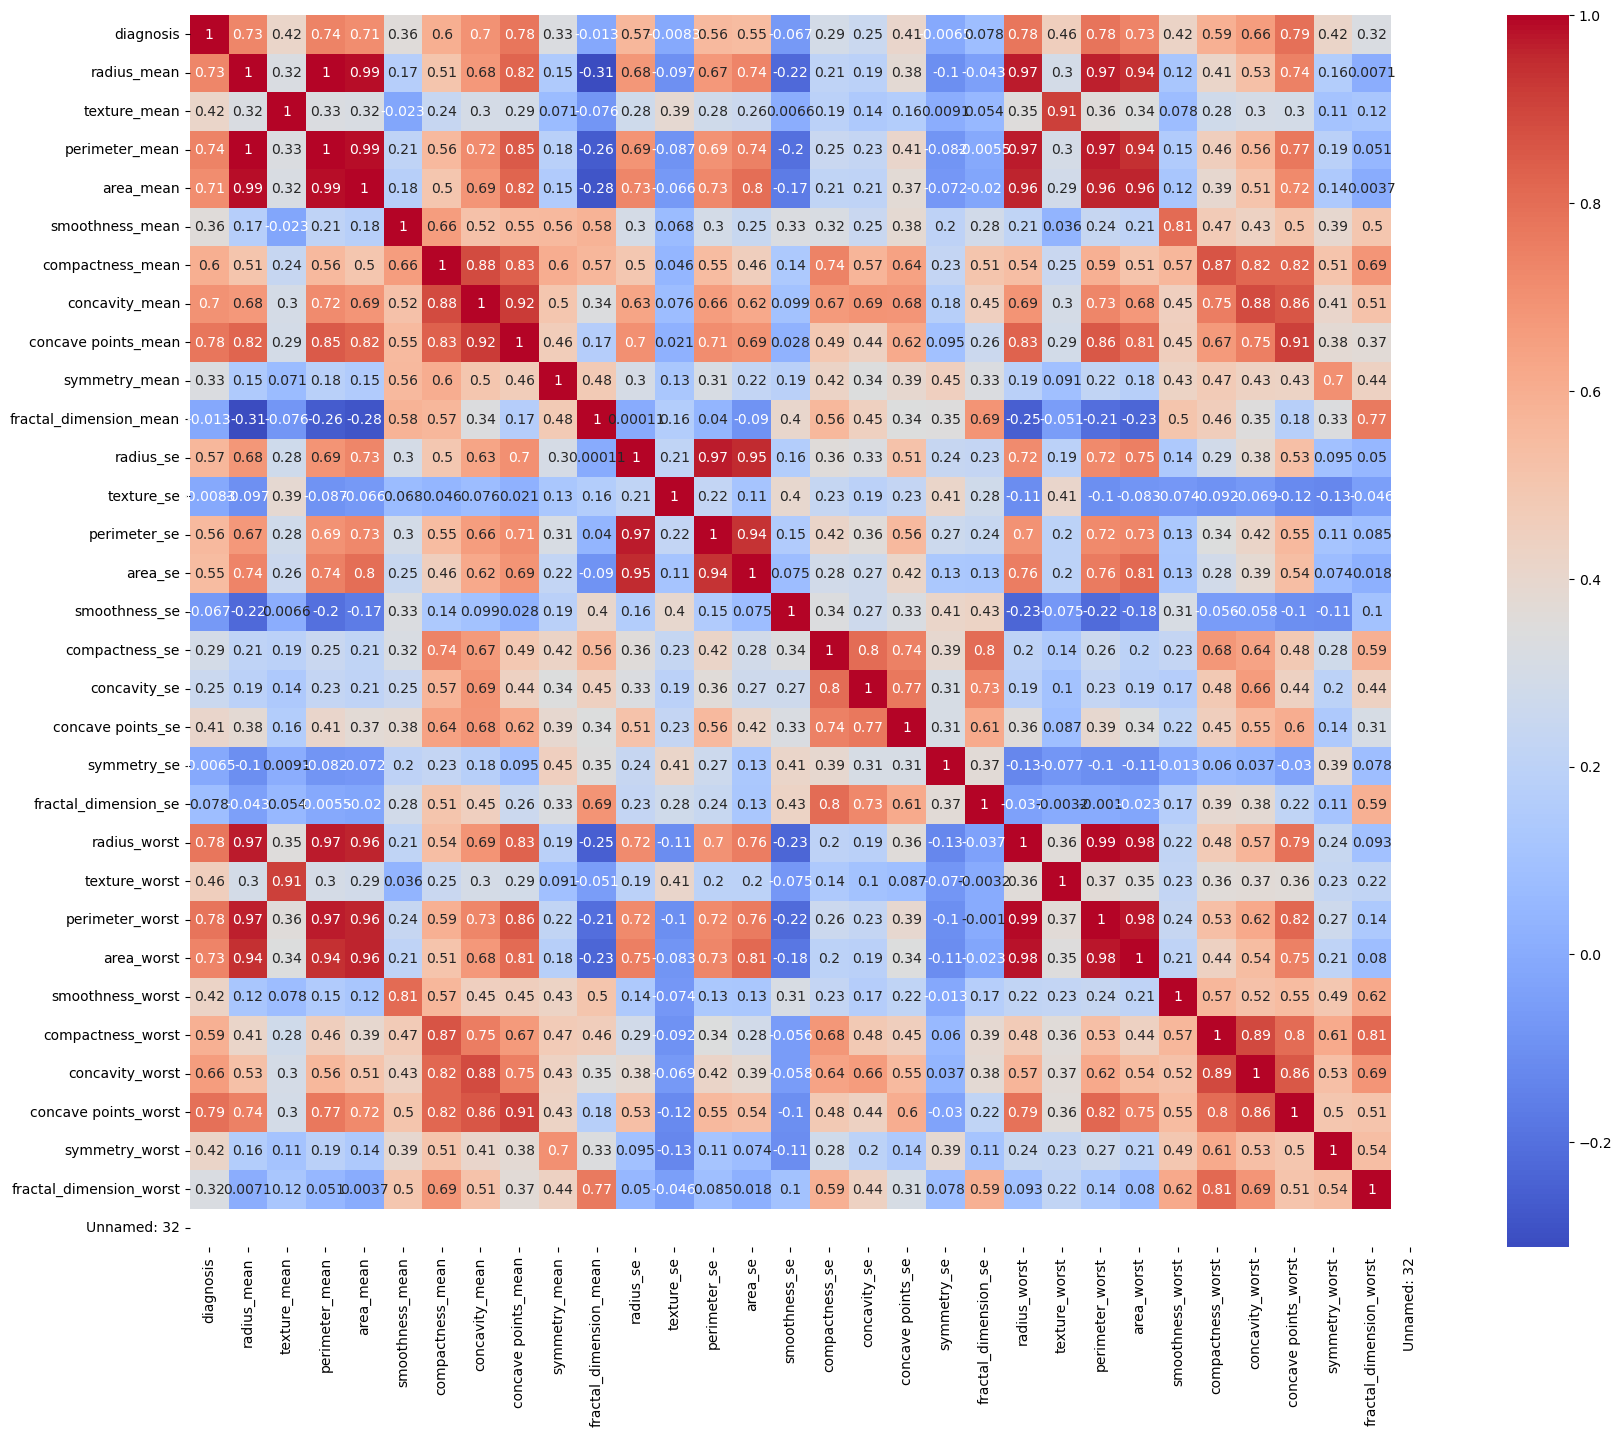

In [7]:
# Correlation histogram:
corr = df.corr()

fig, ax = plt.subplots(figsize=(20, 16))

sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()

In [8]:
# Select the features that have the strongest positive correlation with the "diagnosis":
features = df.loc[:, ["diagnosis","radius_mean", "perimeter_mean", "concave points_mean", "radius_worst", "perimeter_worst", "concave points_worst"]]

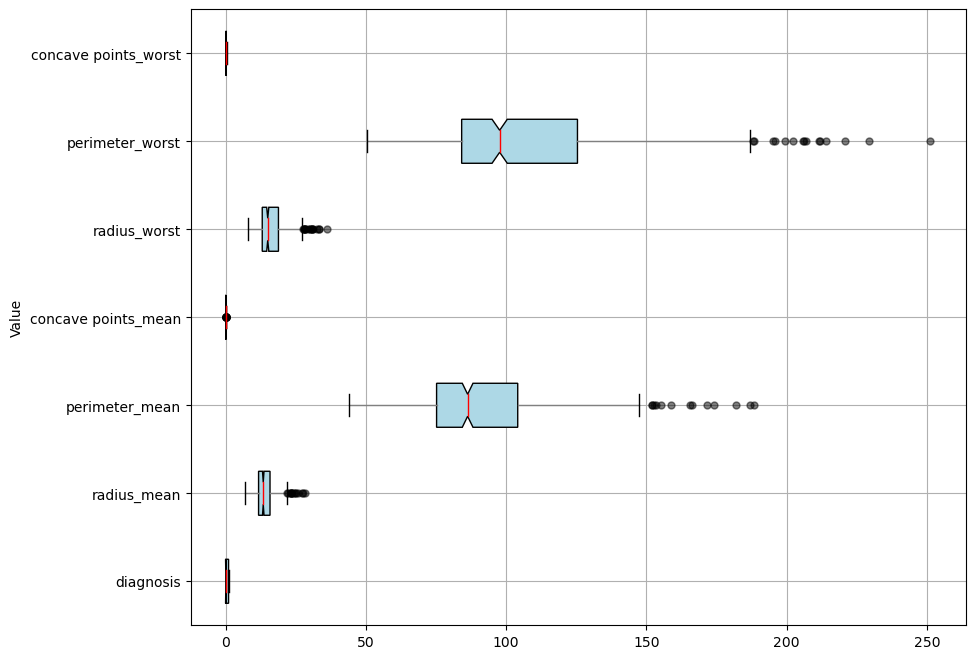

In [9]:
# Boxplots with the feature variables:
plt.figure(figsize=(10, 8))
features.boxplot(           
           notch=True,              # add notches to the boxes
           vert=False,              # plot horizontal boxes
           patch_artist=True,       # add fill color to the boxes
           boxprops=dict(facecolor='lightblue'),  # set the box color
           whiskerprops=dict(color='gray'),       # set the whisker color
           medianprops=dict(color='red'),         # set the median line color
           flierprops=dict(marker='o', markersize=5, markerfacecolor='black', alpha=0.5))

plt.ylabel('Value')
plt.show()

# Interpretation: most of these variables contain outliers that could significantly harm the machine learning's performance.

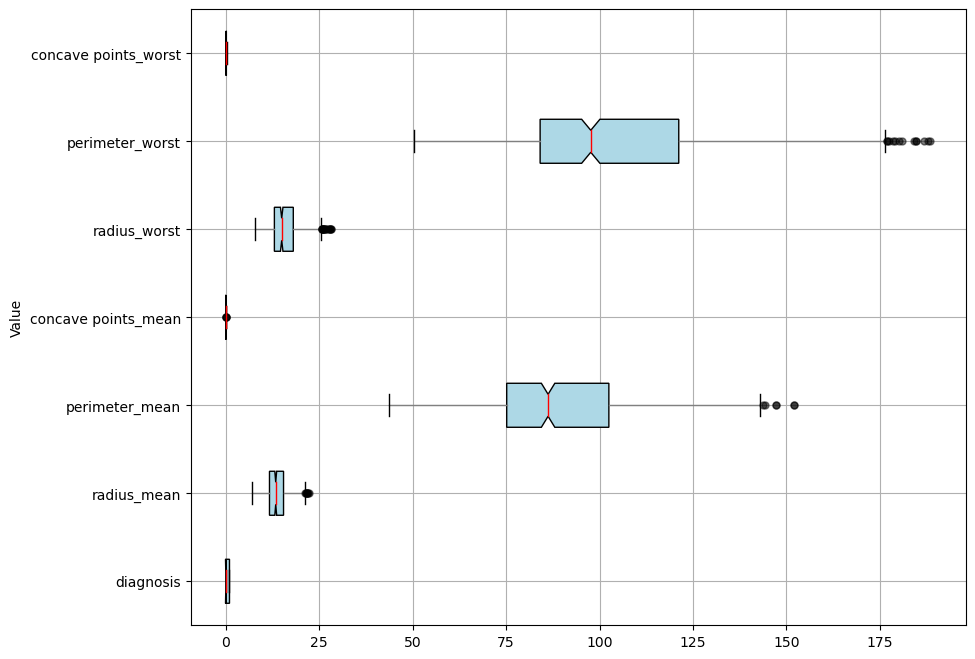

In [10]:
# Removing outliers with the Z-Score method:
threshold = 2.5

mean = features.mean()
std = features.std()

lower_bound = mean - threshold * std
upper_bound = mean + threshold * std

# Filter the data within the bounds:
zscore_features = features[((features >= lower_bound) & (features <= upper_bound))]
zscore_features.fillna(df.mean(), inplace=True)

# New boxplots:
plt.figure(figsize=(10, 8))
zscore_features.boxplot(           
           notch=True,              # add notches to the boxes
           vert=False,              # plot horizontal boxes
           patch_artist=True,       # add fill color to the boxes
           boxprops=dict(facecolor='lightblue'),  # set the box color
           whiskerprops=dict(color='gray'),       # set the whisker color
           medianprops=dict(color='red'),         # set the median line color
           flierprops=dict(marker='o', markersize=5, markerfacecolor='black', alpha=0.5))

plt.ylabel('Value')
plt.show()

#### Binary Classification Machine Learning Algorithms

In [11]:
# Splitting training and testing data: 
train_data, test_data = train_test_split(zscore_features, test_size=0.3, random_state=123)

# Separate the dependent variable from the features:
train_X = train_data.drop("diagnosis", axis=1)
train_y = train_data["diagnosis"]

test_X = test_data.drop("diagnosis", axis=1)
test_y = test_data["diagnosis"]

In [12]:
# Logistic Regression Algorithm:
lr = LogisticRegression(C=1.0, penalty="l2", solver="liblinear", max_iter=100)
lr.fit(train_X, train_y)

LR_pred = lr.predict(test_X)

# Evaluation of the model:
acc = accuracy_score(test_y, LR_pred)
cm = confusion_matrix(test_y, LR_pred)

print("Accuracy:", acc)
print("Confusion matrix:\n" + str(cm))

Accuracy: 0.9298245614035088
Confusion matrix:
[[102   1]
 [ 11  57]]


In [13]:
# Decision Tree Classifier Algorithm:
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=4)
dt.fit(train_X, train_y)

DT_pred = dt.predict(test_X)

# Evaluation of the model:
acc = accuracy_score(test_y, DT_pred)
cm = confusion_matrix(test_y, DT_pred)

print("Accuracy:", acc)
print("Confusion matrix:\n" + str(cm))

Accuracy: 0.935672514619883
Confusion matrix:
[[100   3]
 [  8  60]]


In [14]:
# Random Forest Classifier Algorithm:
rf = RandomForestClassifier(n_estimators=250, max_depth=5)
rf.fit(train_X, train_y)

RF_pred = rf.predict(test_X)

# Evaluation of the model:
acc = accuracy_score(test_y, RF_pred)
cm = confusion_matrix(test_y, RF_pred)

print("Accuracy:", acc)
print("Confusion matrix:\n" + str(cm))

Accuracy: 0.9590643274853801
Confusion matrix:
[[99  4]
 [ 3 65]]


In [15]:
# Naive Bayes Model:
nb = GaussianNB()
nb.fit(train_X, train_y)

NB_pred = nb.predict(test_X)

# Evaluation of the model:
acc = accuracy_score(test_y, NB_pred)
cm = confusion_matrix(test_y, NB_pred)

print("Accuracy:", acc)
print("Confusion matrix:\n" + str(cm))

Accuracy: 0.9649122807017544
Confusion matrix:
[[101   2]
 [  4  64]]
